### Importing libraries

In [202]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import re
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
from sklearn.model_selection import train_test_split
import matplotlib
matplotlib.use('tkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Importing the dataset

In [203]:
path ='/Users/maryrosejofelvillacampa/Desktop/datasets/astronomical_data.csv'
df = pd.read_csv(path)
df = pd.DataFrame(df)
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3042,0.0005,0.1542,16.6,0,Red,M
1,2600,0.0003,0.102,18.7,0,Red,M
2,2800,0.0002,,16.65,0,Red,M
3,1939,0.000138,0.103,20.06,0,Red,M
4,2840,,0.11,16.98,0,Red,M
...,...,...,...,...,...,...,...
234,38940,374830,1356,-9.93,5,Blue,O
235,30839,834042,1194,-10.63,5,Blue,O
236,8829,537493,1423,-10.73,5,White,A
237,9235,404940,1112,-11.23,5,White,A


### Data exploration

In [204]:
#converting columns "Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Star type" into numeric format
df[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Star type"]] = \
df[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Star type"]].apply(pd.to_numeric, errors='coerce')
df["Star color"] = pd.Categorical(df["Star color"])
df["Spectral Class"] = pd.Categorical(df["Spectral Class"])

#replacing empty cells for columns "Star color" and "Spectral Class" with NaN
df["Star color"] = df["Star color"].replace("\s", np.nan, regex=True)
df["Spectral Class"] = df["Spectral Class"].replace("\s", np.nan, regex=True)

#inspecting the dimension of the dataset
shape = df.shape
print(f"There are {shape[0]} rows by {shape[1]} columns.")

#checking for duplicated rows in the dataset
dupes = df.duplicated().sum()
if dupes == 0:
    print("There are no duplicated rows in the dataset.")
else:
    print(f"There are {dupes} duplicated rows in the dataset")

print("The number of empty cells are listed below per feature.")

#checking the null values for each column
nulls = df.isnull().sum()
print(nulls)


There are 239 rows by 7 columns.
There are no duplicated rows in the dataset.
The number of empty cells are listed below per feature.
Temperature (K)           2
Luminosity(L/Lo)          6
Radius(R/Ro)              7
Absolute magnitude(Mv)    5
Star type                 0
Star color                6
Spectral Class            2
dtype: int64


### Data preprocessing

#### Predictor variables

In [205]:
mean_temp = df["Temperature (K)"].mean() #gets the mean from the temperature values
df["Temperature (K)"] = df["Temperature (K)"].fillna(mean_temp) #filling the empty temperature cells with the mean temperature

mean_lum = df["Luminosity(L/Lo)"].mean() #gets the mean from the luminosity values
df["Luminosity(L/Lo)"] = df["Luminosity(L/Lo)"].fillna(mean_lum) #filling the empty luminosity cells with the mean luminosity

mean_mv = df["Absolute magnitude(Mv)"].mean() #gets the mean from the absolute magnitude values
df["Absolute magnitude(Mv)"] = df["Absolute magnitude(Mv)"].fillna(mean_mv) #filling the empty absolute magnitude cells with the mean absolute magnitude

mean_rad = df["Radius(R/Ro)"].mean() #gets the mean from the Radius values
df["Radius(R/Ro)"] = df["Radius(R/Ro)"].fillna(mean_rad) #filling the empty Radius cells with the mean Radius

#### Spectral Class

In [206]:
df = df.dropna(subset=["Spectral Class"]) #drops the the rows with empty values in the spectral class column

# ordinal encoding for spectral class feature 
df["Spectral Class"] = df["Spectral Class"].replace({
    "M": 0,
    "K": 1,
    "G": 2,
    "F": 3,
    "A": 4,
    "B": 5,
    "O": 6,
})
df["Spectral Class"] = pd.to_numeric(df["Spectral Class"])

df #prints the df to checks and see if the spectral class is converted from categorical to numerical values

/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/ipykernel_3558/3226806235.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Spectral Class"] = df["Spectral Class"].replace({
/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/ipykernel_3558/3226806235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spectral Class"] = df["Spectral Class"].replace({
/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/ipykernel_3558/3226806235.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3042.0,0.000500,0.154200,16.60,0,Red,0
1,2600.0,0.000300,0.102000,18.70,0,Red,0
2,2800.0,0.000200,238.393907,16.65,0,Red,0
3,1939.0,0.000138,0.103000,20.06,0,Red,0
4,2840.0,107266.981895,0.110000,16.98,0,Red,0
...,...,...,...,...,...,...,...
234,38940.0,374830.000000,1356.000000,-9.93,5,Blue,6
235,30839.0,834042.000000,1194.000000,-10.63,5,Blue,6
236,8829.0,537493.000000,1423.000000,-10.73,5,White,4
237,9235.0,404940.000000,1112.000000,-11.23,5,White,4


#### Star color

In [207]:
df["Star color"] = df["Star color"].replace("\s", np.nan, regex=True) #replacing empty values (white spaces) in cells with NaN

features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'] #assigning features for imputing the star color missing values

df_missing = df[df["Star color"].isnull()] #creates a dataset for the rows with missing star color values
df_not_missing = df[df["Star color"].notnull()] #creates a dataset for the rows with present star color values

df_not_missing["Star color"] = pd.Categorical(df_not_missing["Star color"]).codes 

#knn imputer for predicting the star color values 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(df_not_missing[features], df_not_missing["Star color"])

df_missing["Star color"] = knn.predict(df_missing[features])

df['Star color'] = pd.Categorical(df['Star color'])
df['Star color'] = pd.Categorical(df['Star color'], categories=pd.Categorical(df_not_missing['Star color']).categories)

dfn = pd.concat([df_not_missing, df_missing]).sort_index()

df = pd.DataFrame(dfn)
df

/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/ipykernel_3558/1367713166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Star color"] = df["Star color"].replace("\s", np.nan, regex=True) #replacing empty values (white spaces) in cells with NaN
/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/ipykernel_3558/1367713166.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_missing["Star color"] = pd.Categorical(df_not_missing["Star color"]).codes
/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3042.0,0.000500,0.154200,16.60,0,3,0
1,2600.0,0.000300,0.102000,18.70,0,3,0
2,2800.0,0.000200,238.393907,16.65,0,3,0
3,1939.0,0.000138,0.103000,20.06,0,3,0
4,2840.0,107266.981895,0.110000,16.98,0,3,0
...,...,...,...,...,...,...,...
234,38940.0,374830.000000,1356.000000,-9.93,5,1,6
235,30839.0,834042.000000,1194.000000,-10.63,5,1,6
236,8829.0,537493.000000,1423.000000,-10.73,5,4,4
237,9235.0,404940.000000,1112.000000,-11.23,5,4,4


In [208]:
nulls = df.isnull().sum()
print(nulls)

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


### Checking assumptions

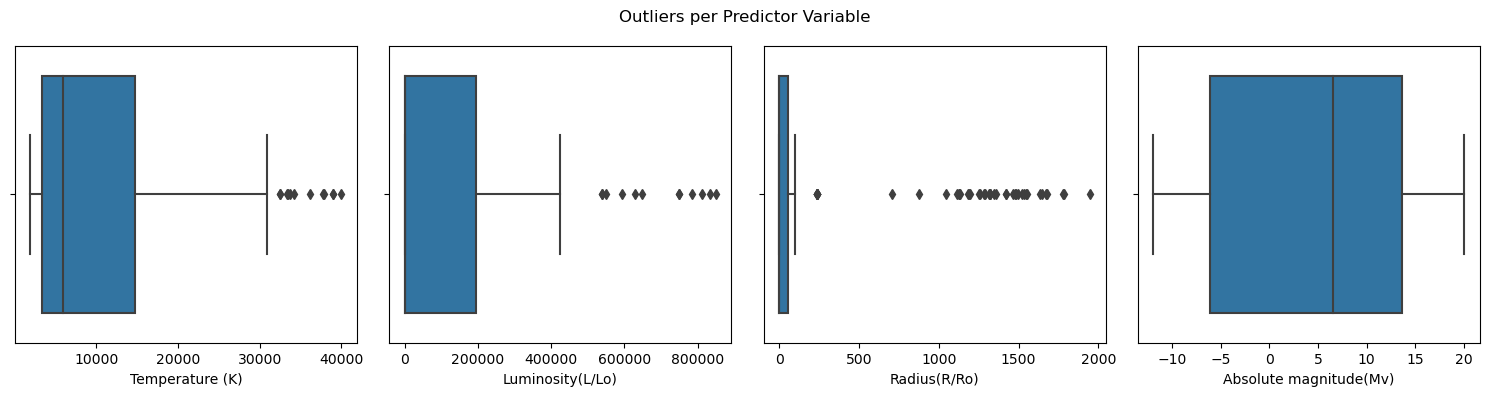

In [209]:
#box plot for checking outliers
plt.figure(figsize=(15,4))

plt.subplot(1,4,1)
sns.boxplot(x=df["Temperature (K)"])

plt.subplot(1,4,2)
sns.boxplot(x=df["Luminosity(L/Lo)"])

plt.subplot(1,4,3)
sns.boxplot(x=df["Radius(R/Ro)"])

plt.subplot(1,4,4)
sns.boxplot(x=df["Absolute magnitude(Mv)"])

plt.suptitle("Outliers per Predictor Variable")
plt.tight_layout()
plt.show()

Spectral Class
0    109
5     46
6     39
4     19
3     17
1      6
2      1
Name: count, dtype: int64


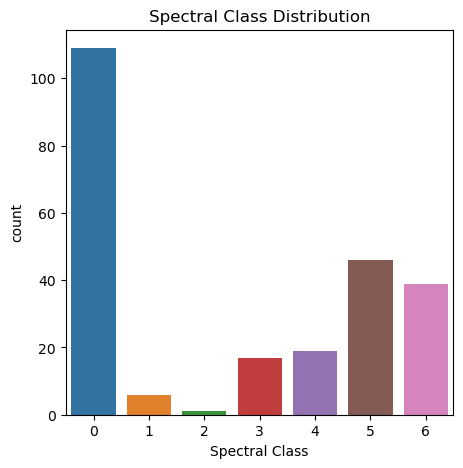

In [210]:
#checking class imbalance
class_distribution = df["Spectral Class"].value_counts()
print(class_distribution)

plt.figure(figsize=(5,5))
sns.countplot(x=df["Spectral Class"], data=df)
plt.title("Spectral Class Distribution")
plt.show()

In [211]:
#outlier transformation for temperature, luminosity, and radius
#absolute magnitude is not included since the feature doesn't have any outliers
df['temperature_log'] = np.log1p(df["Temperature (K)"])
df['luminosity_log'] = np.log1p(df["Luminosity(L/Lo)"])
df['radius_log'] = np.log1p(df["Radius(R/Ro)"])

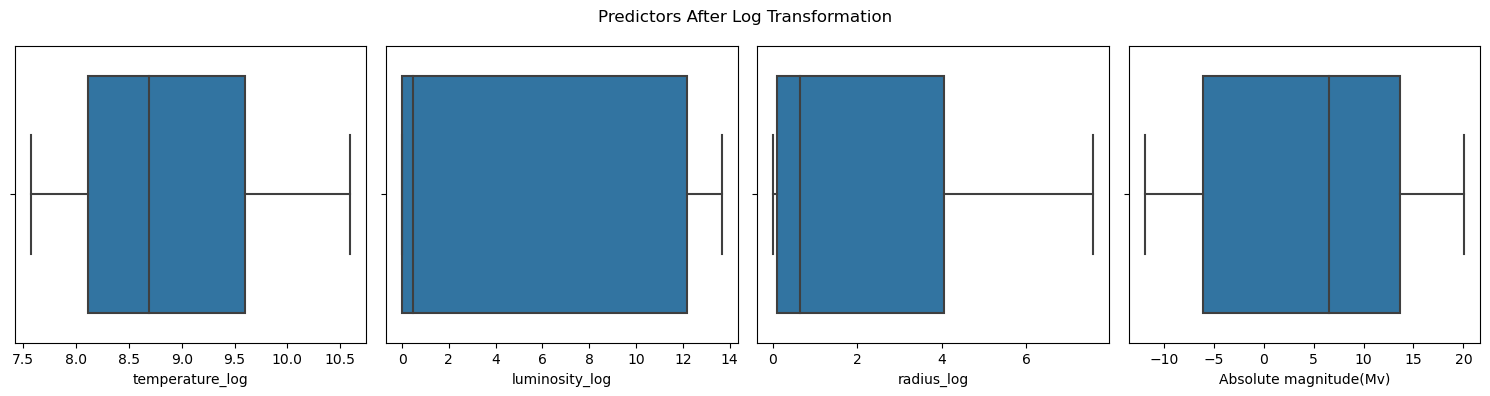

In [212]:
plt.figure(figsize=(15, 4))

plt.subplot(1,4,1)
sns.boxplot(x=df["temperature_log"])

plt.subplot(1,4,2)
sns.boxplot(x=df["luminosity_log"])

plt.subplot(1,4,3)
sns.boxplot(x=df["radius_log"])

plt.subplot(1,4,4)
sns.boxplot(x=df["Absolute magnitude(Mv)"])

plt.suptitle("Predictors After Log Transformation")
plt.tight_layout()
plt.show()

### Data modeling

In [213]:
#define x and y features
x_features = df[['temperature_log', 'luminosity_log', 'radius_log', 'Absolute magnitude(Mv)']]
y_features = df["Spectral Class"]

#split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_features, y_features, test_size=0.2, random_state=42)

In [214]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance') #initialize KNN classifier as model with weighted distances
model.fit(x_train, y_train) #fit training sets into the model

y_pred = model.predict(x_test) #predict y_pred by using the model on x_test values 

### Model assessment

In [215]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"The model's accuracy: {accuracy:.2f}\n")
print(report)

The model's accuracy: 0.81

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       0.00      0.00      0.00         2
           3       0.50      0.33      0.40         3
           4       0.00      0.00      0.00         4
           5       0.73      0.89      0.80         9
           6       0.67      1.00      0.80         4

    accuracy                           0.81        48
   macro avg       0.47      0.54      0.49        48
weighted avg       0.71      0.81      0.75        48



/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

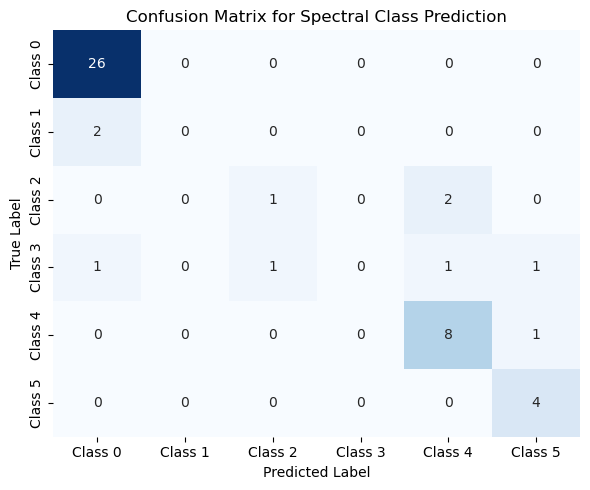

In [216]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])

plt.title('Confusion Matrix for Spectral Class Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

### Data Augmentation

In [217]:
# Define original feature columns for augmentation
original_feature_columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
derived_feature_columns = ['temperature_log', 'luminosity_log', 'radius_log']
classes = df["Spectral Class"].unique()
target_count = 109  # Target sample count for each class

# Function to augment existing data points with slight noise
def augment_data(data, num_samples_needed, class_label):
    # Randomly sample from the original data
    sampled_data = data.sample(n=num_samples_needed, replace=True)

    # Add slight Gaussian noise to the data
    noise = np.random.normal(loc=0, scale=0.01, size=sampled_data[original_feature_columns].shape)
    sampled_data_augmented = sampled_data[original_feature_columns] + noise

    # Add the spectral class label back
    sampled_data_augmented['Spectral Class'] = class_label

    # Recalculate the log-transformed features
    sampled_data_augmented['temperature_log'] = np.log1p(sampled_data_augmented['Temperature (K)'])
    sampled_data_augmented['luminosity_log'] = np.log1p(sampled_data_augmented['Luminosity(L/Lo)'])
    sampled_data_augmented['radius_log'] = np.log1p(sampled_data_augmented['Radius(R/Ro)'])

    return sampled_data_augmented

# List to store all the augmented data for each class
augmented_dataframes = []

# Loop through each class except class 0
for cls in classes:
    if cls == 0:
        continue  # Skip majority class 0

    # Get the subset of the original data for the current class
    class_data = df[df["Spectral Class"] == cls]

    # Calculate the number of samples needed to reach the target count
    num_samples_needed = target_count - class_data.shape[0]

    # Augment data for the current class if needed
    if num_samples_needed > 0:
        augmented_class_data = augment_data(class_data, num_samples_needed, cls)
        augmented_dataframes.append(augmented_class_data)

# Combine the original data with all augmented samples
df_augmented = pd.concat([df] + augmented_dataframes, ignore_index=True)
df = df_augmented[['temperature_log', 'luminosity_log', 'radius_log', 'Absolute magnitude(Mv)', 'Spectral Class']]

# Check the updated class distribution
print("Updated Class Distribution:\n", df["Spectral Class"].value_counts())

Updated Class Distribution:
 Spectral Class
0    109
5    109
4    109
3    109
6    109
1    109
2    109
Name: count, dtype: int64


In [219]:
df

,temperature_log,luminosity_log,radius_log,Absolute magnitude(Mv),Spectral Class
0,8.020599,0.000500,0.143407,16.600000,0
1,7.863651,0.000300,0.097127,18.700000,0
2,7.937732,0.000200,5.478110,16.650000,0
3,7.570443,0.000138,0.098034,20.060000,0
4,7.951911,11.583085,0.104360,16.980000,0
...,...,...,...,...,...
758,8.832151,12.341482,7.291653,-10.067647,2
759,8.832152,12.341482,7.291649,-10.061064,2
760,8.832149,12.341482,7.291654,-10.070350,2
761,8.832150,12.341482,7.291659,-10.059333,2
